In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [136]:
df = pd.read_csv("../../datasets/Magic_telescope/telescope_data.csv")
df

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [137]:
df.pop("Unnamed: 0")
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Lets check all the classes in the dataset and make them into binary

In [138]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [139]:
df['class'] = (df['class'] == 'g').astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


Now lets visualize all the features to see if we can get some insights

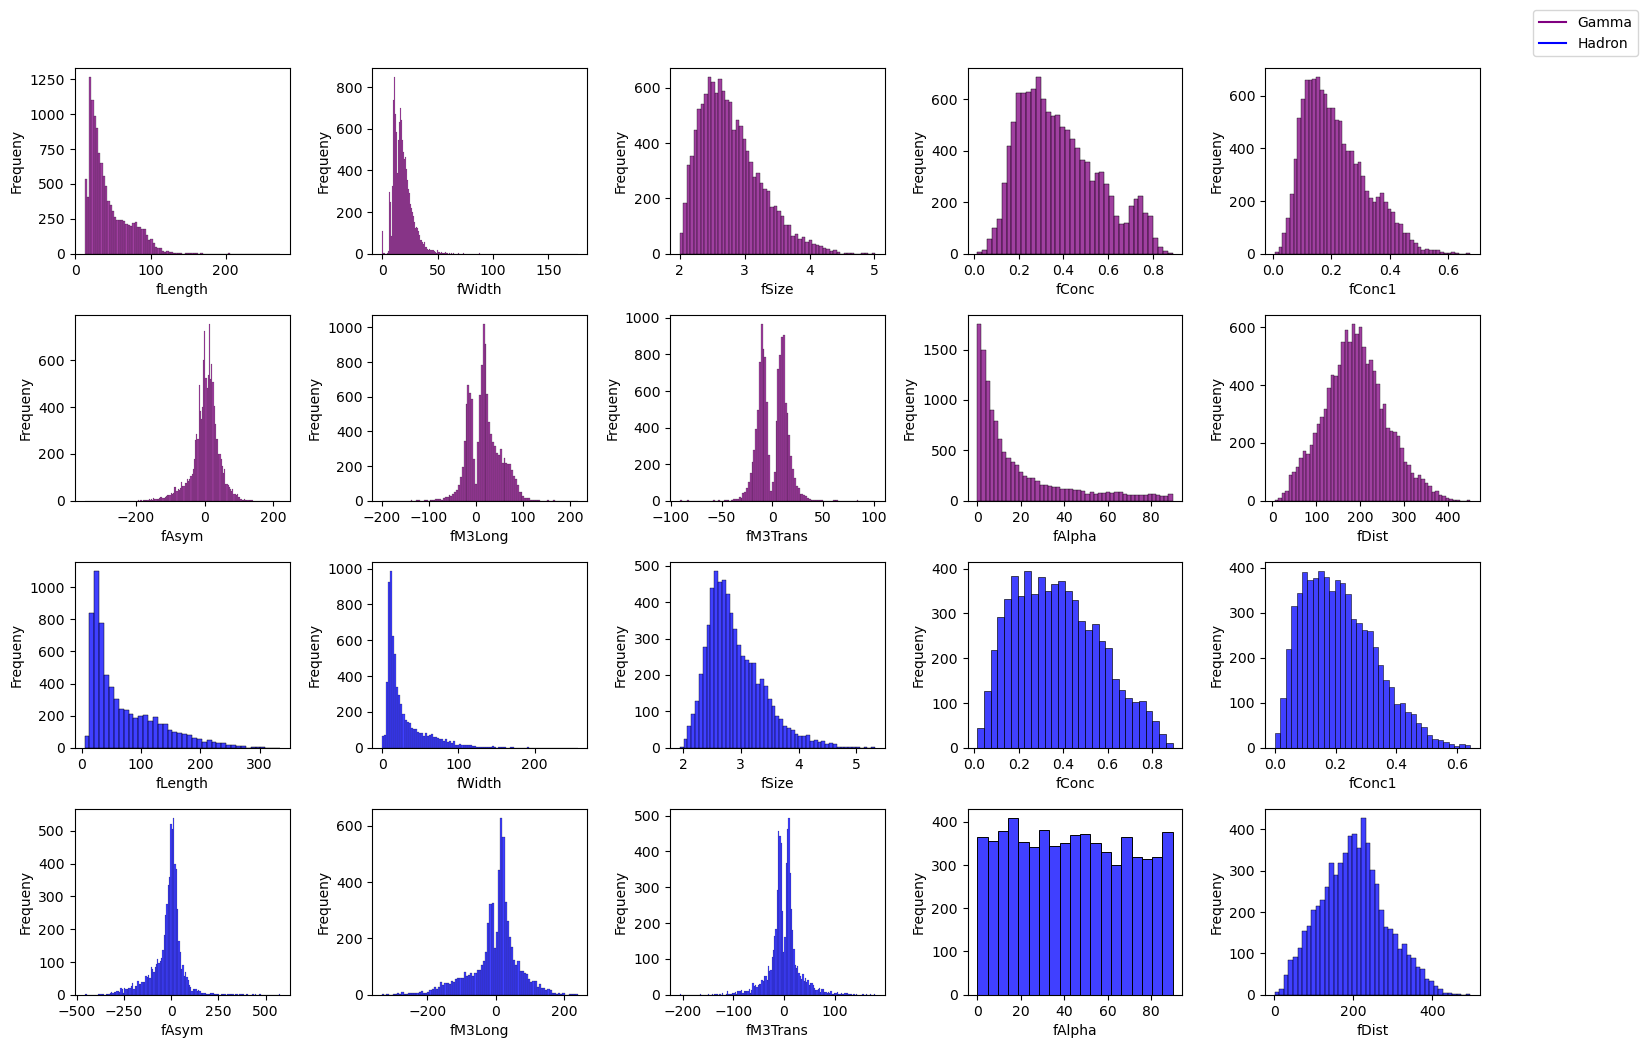

In [140]:
features = df.columns[:-1]
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

i, j = -1, 0 # Matrix indexes
for c in range(20):
    i = i + 1 if c % 5 == 0 else i
    j = j + 1 if c % 5 != 0 else 0
    label = 1 if c < 10 else 0
    color = 'purple' if label == 1 else 'blue'
    graph = axes[i, j]
    graph.set_xlabel(features[c % 10])
    graph.set_ylabel("Frequeny")
    sns.histplot(df[df['class'] == label][features[c % 10]], color=color, ax=graph)

legend_labels = [Line2D([0], [0], color='purple', label='Gamma'),
                 Line2D([0], [0], color='blue', label='Hadron')]
fig.legend(handles=legend_labels, loc='upper right', bbox_to_anchor=(1.10, 1.05))

plt.tight_layout()
plt.show()

We can notice at first that the values have a huge scale difference, this might interfeer in the models performace. So we are going to normalize the values

In [141]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()

In [142]:
df.iloc[:, :-1] = normalizer.fit_transform(df.iloc[:, :-1])
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0.074306,0.062415,0.208043,0.430390,0.293229,0.470032,0.620576,0.512493,0.445467,0.163066,1
1,0.082815,0.045727,0.170668,0.587794,0.558601,0.468649,0.623756,0.507944,0.070677,0.412679,1
2,0.478241,0.530579,0.626818,0.027617,0.027263,0.556215,0.468201,0.416540,0.855111,0.516926,1
3,0.059212,0.037338,0.117445,0.683714,0.580679,0.469558,0.570630,0.515219,0.116100,0.233582,1
4,0.214774,0.120603,0.360674,0.345153,0.271003,0.437870,0.632050,0.590373,0.051644,0.718582,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,0.051838,0.042581,0.199527,0.650756,0.582457,0.457992,0.602182,0.541215,0.026921,0.213530,0
19016,0.074757,0.026141,0.096363,0.593249,0.412061,0.479112,0.605095,0.526076,0.964417,0.498046,0
19017,0.215712,0.185389,0.445594,0.146153,0.080901,0.434164,0.653983,0.509218,0.336652,0.516377,0
19018,0.352326,0.299950,0.606919,0.092397,0.100756,0.448838,0.417922,0.368263,0.940971,0.823491,0


Now its time to split our data 

In [143]:
def splitData(data) -> np.array:
    shuffle_data = data.sample(frac=1)
    training_part = int(0.7 * len(data))
    validation_part = int(0.85 * len(data))

    training, validation, testing = np.split(shuffle_data, [training_part, validation_part])

    return training, validation, testing

In [144]:
train, val, test = splitData(df)
train.shape, val.shape, test.shape

((13314, 11), (2853, 11), (2853, 11))

In [145]:
x_train, y_train = train.iloc[:, :-1], train["class"]
x_val, y_val = val.iloc[:, :-1], val["class"]
x_test, y_test = test.iloc[:, :-1], test["class"]

In [146]:
y_train.value_counts()

1    8640
0    4674
Name: class, dtype: int64

Our training data has a class imbaleced issue. In order to keep the models training effective, we are gonna use the oversample technique

In [147]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

In [148]:
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
y_train.value_counts()

0    8640
1    8640
Name: class, dtype: int64

Okay, now the data might be okay to be used in the models

### K-Nearest Neighbors

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [150]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [151]:
def testAndTotalaccuracy(model):
    y_test_pred = model.predict(x_test)
    y_test_pred = (y_test_pred > 0.5).astype(int)
    y_total_pred = model.predict(df.iloc[:,:-1])
    y_total_pred = (y_total_pred > 0.5).astype(int)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    total_accuracy = accuracy_score(df.iloc[:, -1], y_total_pred)
    return test_accuracy, total_accuracy

In [152]:
knn_test_accuracy, knn_total_accuracy = testAndTotalaccuracy(knn_model)
print(f"Test accurracy score: {knn_test_accuracy}")
print(f"Total accurracy score: {knn_total_accuracy}")

Test accurracy score: 0.8107255520504731
Total accurracy score: 0.8824395373291273


### Gaussian Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB

In [154]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [155]:
gnb_test_accuracy, gnb_total_accuracy = testAndTotalaccuracy(gnb_model)
print(f"Test accurracy score: {gnb_test_accuracy}")
print(f"Total accurracy score: {gnb_total_accuracy}")

Test accurracy score: 0.7343147563967753
Total accurracy score: 0.7236593059936909


### Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [158]:
lr_test_accuracy, lr_total_accuracy = testAndTotalaccuracy(lr_model)
print(f"Test accurracy score: {lr_test_accuracy}")
print(f"Total accurracy score: {lr_total_accuracy}")

Test accurracy score: 0.7907465825446898
Total accurracy score: 0.7883806519453207


### Suport Vector Machine

In [159]:
from sklearn.svm import SVC

In [160]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [161]:
svc_test_accuracy, svc_total_accuracy = testAndTotalaccuracy(svc_model)
print(f"Test accurracy score: {svc_test_accuracy}")
print(f"Total accurracy score: {svc_total_accuracy}")

Test accurracy score: 0.8517350157728707
Total accurracy score: 0.855993690851735


### Neural Network

In [162]:
from tensorflow import keras

In [163]:
nn_model = keras.models.Sequential([
    keras.layers.Input(shape=10),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [164]:
nn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [165]:
nn_model.fit(x_train, y_train, 
             validation_data=(x_val, y_val),
             batch_size=32,
             epochs=50,
             verbose=0
            )

In [166]:
nn_test_accuracy, nn_total_accuracy = testAndTotalaccuracy(nn_model)
print(f"Test accurracy score: {nn_test_accuracy}")
print(f"Total accurracy score: {nn_total_accuracy}")

595/595 [==============================] - 0s 566us/step
Test accurracy score: 0.8356116368734665
Total accurracy score: 0.8400630914826498


* Make the conclusions